# Assumptions of Logistic Regression I

### 1. Target variable is binary

One of the most basic assumptions of logistic regression is that the outcome variable needs to be binary (or in the case of multinomial LR, discrete).

### 2. Independent Observations

While often overlooked, checking for independent observations in a data set is important for the theory behind LR.
This can be violated if, in this case, patients are biopsied multiple times (repeated sampling of the same individual).

### 3. Large enough sample size

Since logistic regression is fit using maximum likelihood estimation instead of least squares minimization, there needs to be a large enough sample to get convergence.
Now, what does “large enough” mean – that is often up to interpretation or the individual.
Often a rule of thumb is that there should be at least 10 samples per feature per class.

### 4. No influential outliers

Logistic regression is sensitive to outliers, so it is also needed to check if there are any influential outliers for model building.
Outliers are a broad topic with a lot of different definitions – z-scores, scaler of the interquartile range, Cook’s distance/influence/leverage, etc
 – so there are many ways to identify them. But here, we will use visual tools to rule-out obvious outliers.

----
&nbsp;
## [Wisconsin Breast Cancer Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) (Diagnostic)
Predict whether a tumour is benign or malignant based on characteristics of the cells such as;
- radius
- texture
- smoothness
- etc...


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [5]:
df = pd.read_csv("Data/breast_cancer_data.csv")
print(F"Shape of dataframe: {df.shape}")
df.head()

Shape of dataframe: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1. Verify the values of `diagnosis` are binary classes

In [6]:
unique_diagnoses = df.diagnosis.unique().tolist()
print(F"There are {len(unique_diagnoses)} unique diagnoses\n{unique_diagnoses}\n")
print(df.diagnosis.value_counts())

There are 2 unique diagnoses
['M', 'B']

B    357
M    212
Name: diagnosis, dtype: int64


In [7]:
#encode M, malignant as 1, B, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

2. Is the number of unique patient IDs equal to the number of samples?

In [8]:
print(F"Unique patient IDs: {df.id.unique().shape[0]}")
if df.id.unique().shape[0] == df.shape[0]:
    print("No repeated patients")
else:
    print("repeated patients")

Unique patient IDs: 569
No repeated patients


3. At a maximum, there should be no more than the smallest class size divided by 10 number of features

In [9]:
max_features = min(df.diagnosis.value_counts()//10)
print(max_features)

21


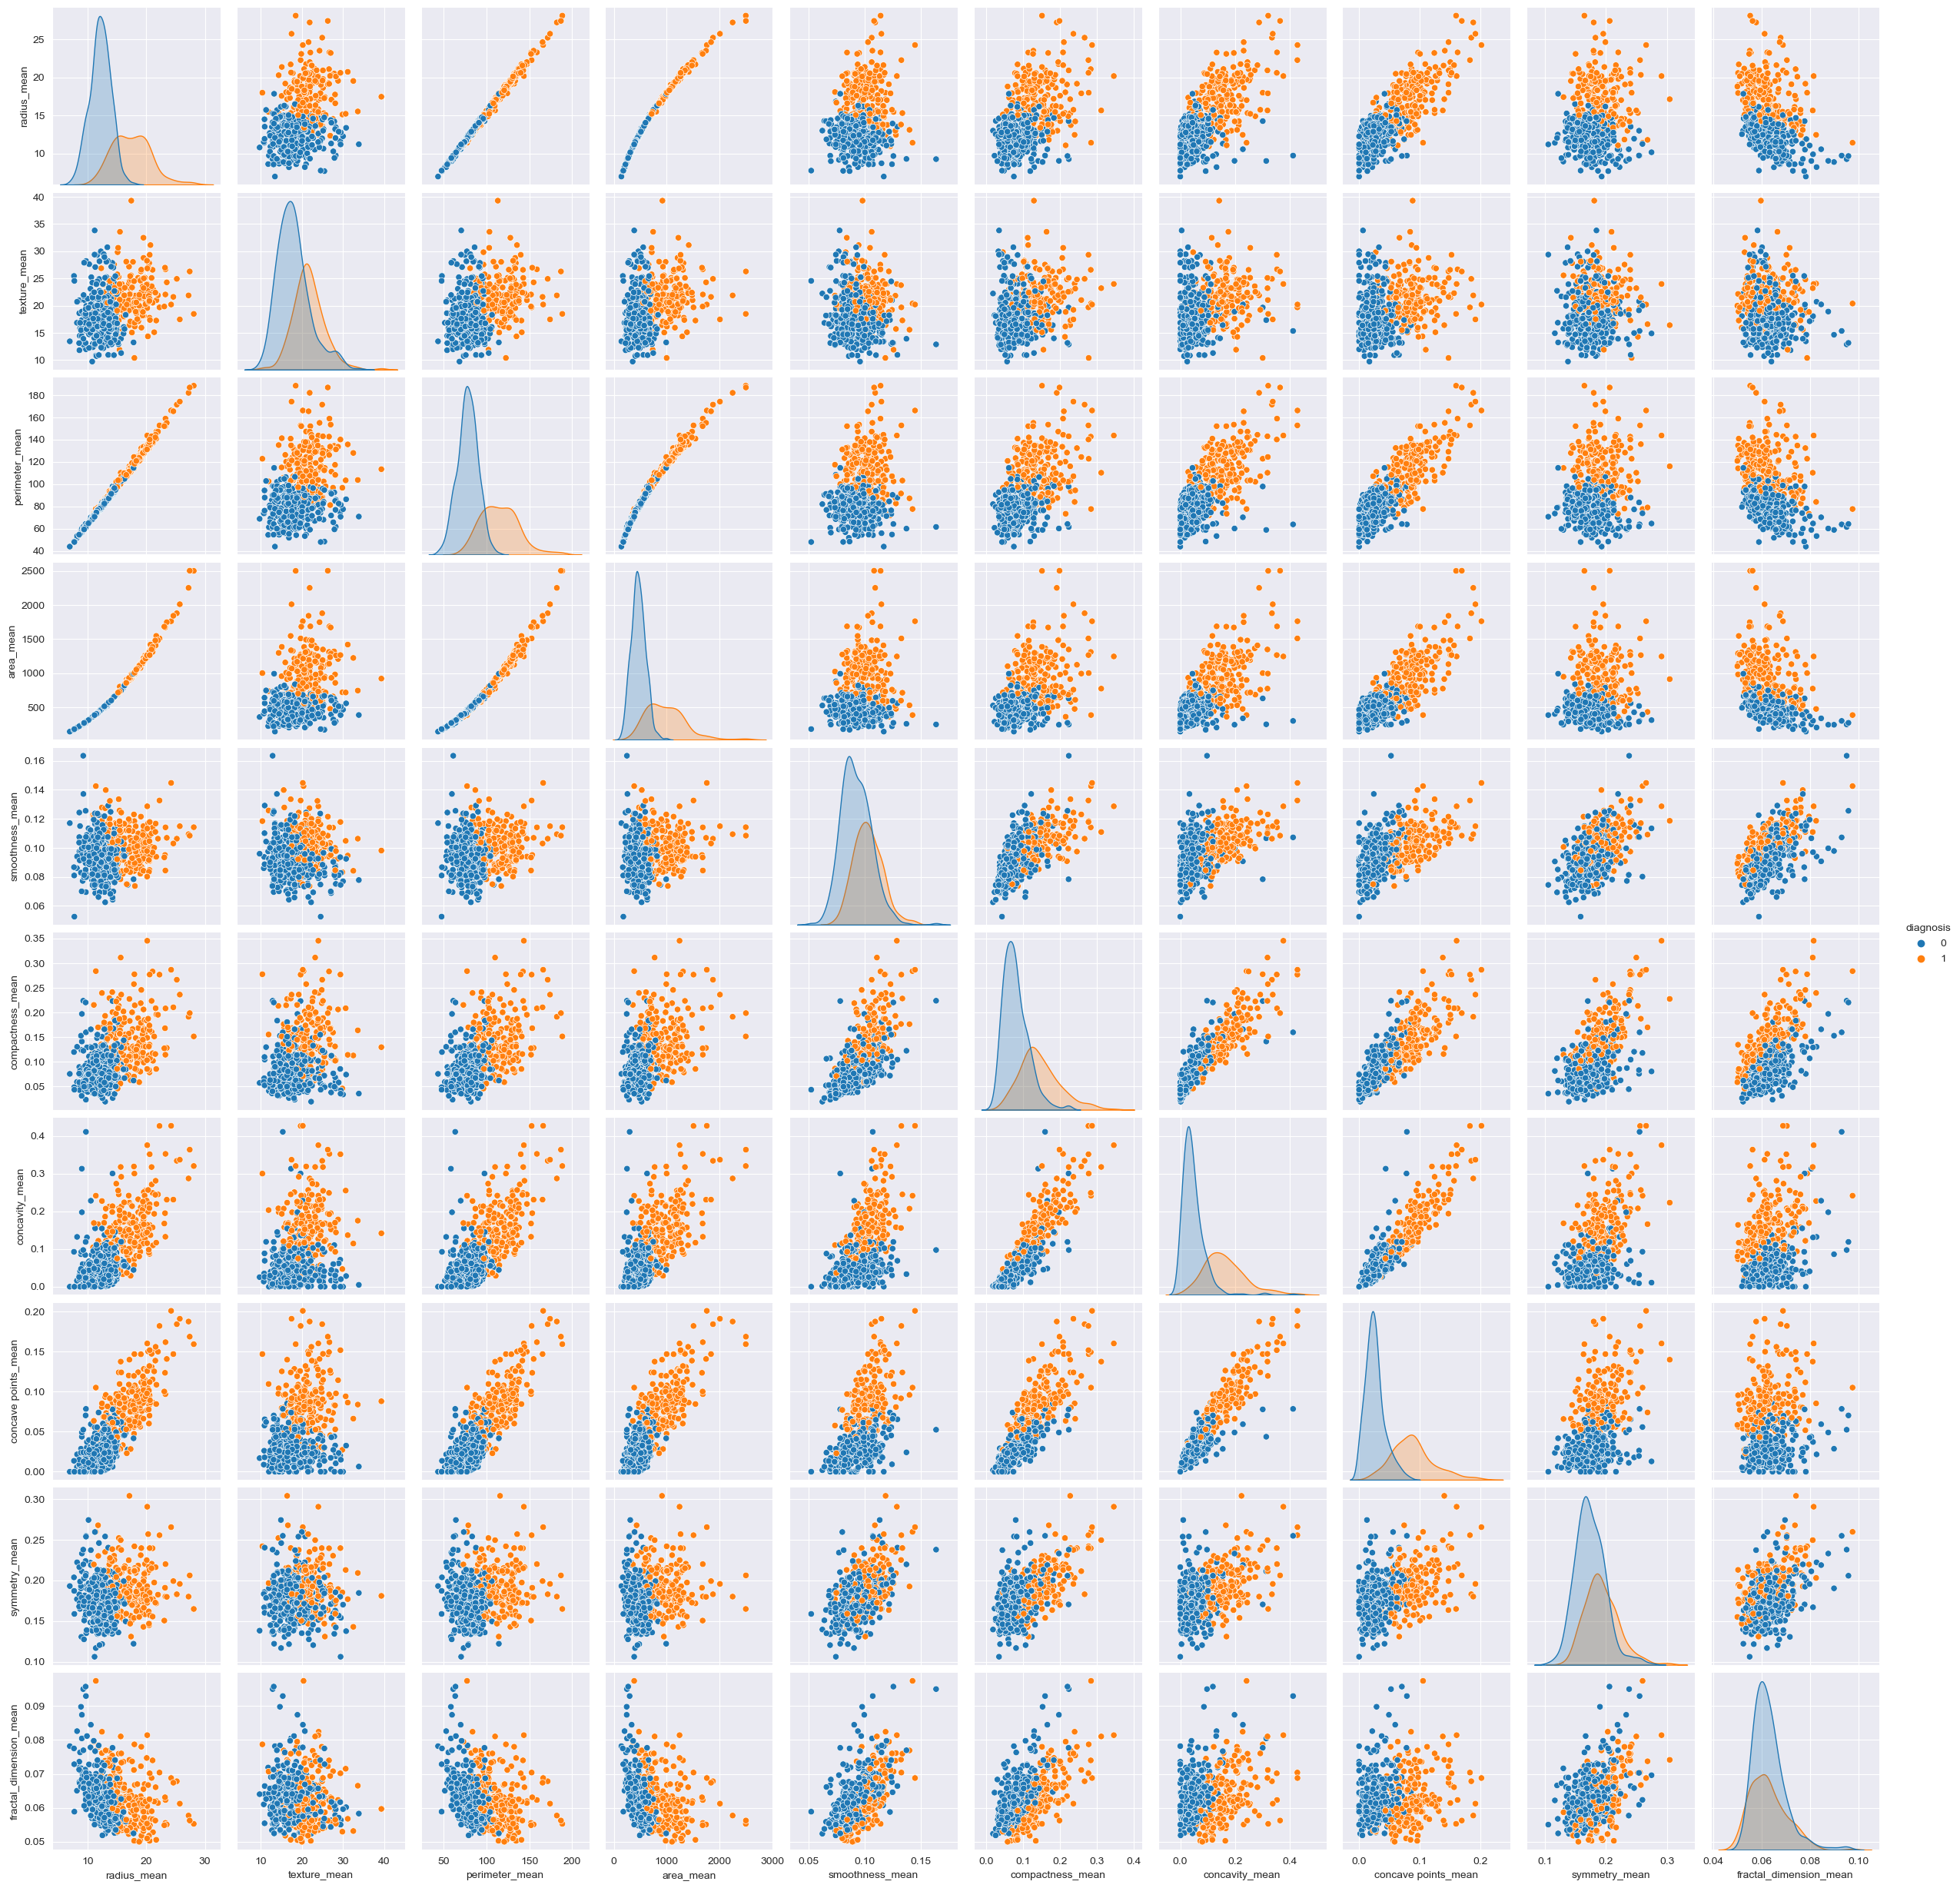

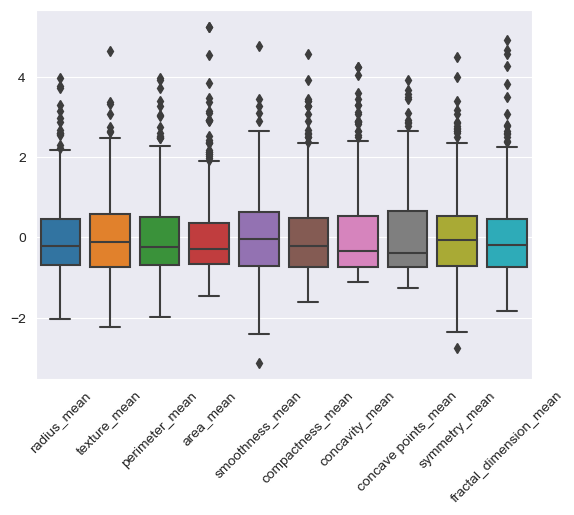

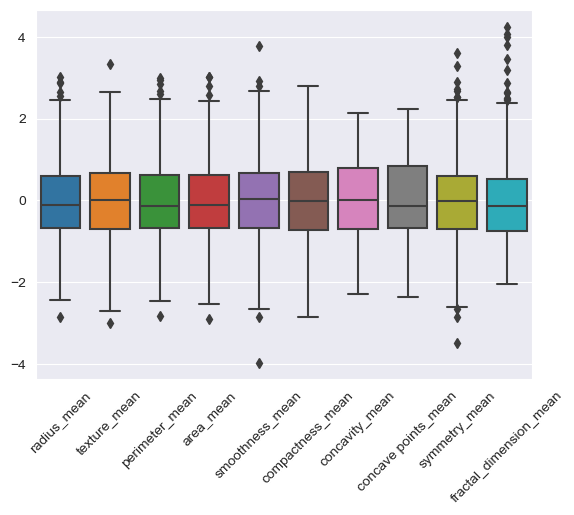

In [10]:
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data= df, hue='diagnosis', vars = predictor_var)
plt.show()
plt.close()
sns.boxplot(data=df[predictor_var].apply(zscore))
plt.xticks(rotation=45);
plt.show()
plt.close()
sns.boxplot(data=np.log(df[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45)
plt.show()

----
&nbsp;
# Assumptions of Logistic Regression II

### 1. Features linearly related to log odds

the underlying assumption of logistic regression is that the features are linearly related to the logit of the outcome.
To test this visually, we can use seaborn’s regplot, with the parameter logistic= True and the x value as our feature of interest.
If this condition is met, the fit model will resemble a sigmoidal curve

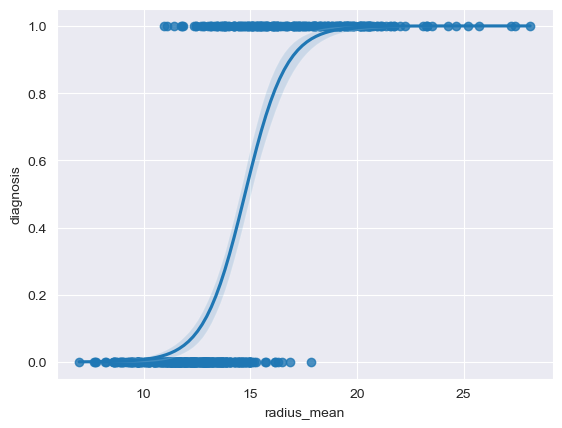

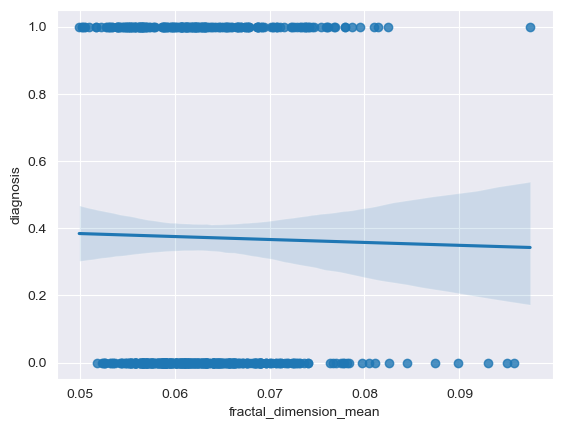

In [11]:
x = df[predictor_var]

#Compare the curves
sns.regplot(x= 'radius_mean', y= 'diagnosis', data= df, logistic= True,)
plt.show()

sns.regplot(x= 'fractal_dimension_mean', y= 'diagnosis', data= df, logistic= True)
plt.show()

### 2. Multicollinearity

Like in linear regression, one of the assumptions is that there is not multicolinearity in the data.
There are many ways to look at this, but the most common are a correlation of features and variance inflation factor (VIF).
With a correlation plot, features that are highly correlated can be dropped from the model to reduce duplication.



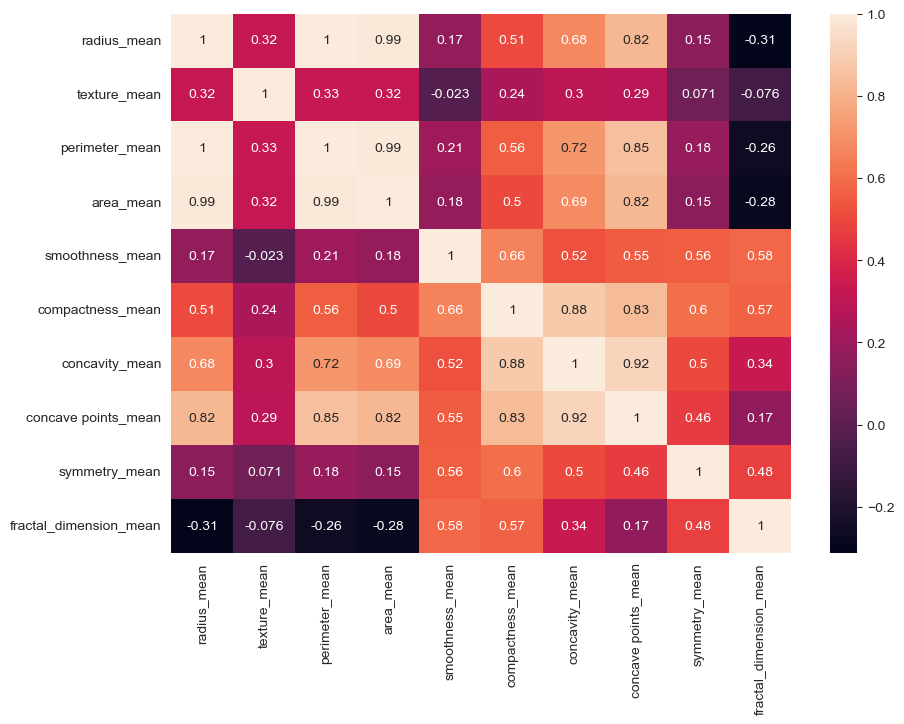

In [12]:
plt.figure(figsize = (10,7))
sns.heatmap(x.corr(), annot=True)
plt.show()

`area_mean`, `perimeter_mean` and `radius_mean` are highly positively correlated

----

# Logistic Regression Parameters in `scikit-learn`

### 1. Model Training and Hyperparameters

Hyperparameters are model settings that can be preset before the model implementation step and tuned later to improve model performance.
They differ from parameters of a model (in the case of Logistic Regression, the feature coefficients) in that they are not the result of model implementation.

In [13]:
predictor_var = ['radius_mean', 'texture_mean',
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

In [14]:
# train a logistic regression classifier on the training set with no regularisation
log_reg = LogisticRegression(penalty='none', fit_intercept=True, tol=0.0000001, solver='newton-cg')
log_reg.fit(x_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg', tol=1e-07)

In [15]:
print(F"Coefficients:\n{log_reg.coef_}\n")
print(F"Intercept: {log_reg.intercept_}")

Coefficients:
[[ 1.07991536  0.28744916 30.96009886 29.97251502]]

Intercept: [-30.15566446]


In [16]:
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)

print(F"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(F"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(F"Recall Score: {recall_score(y_test, y_pred)}")
print(F"Precision Score: {precision_score(y_test, y_pred)}")
print(F"F1 Score: {f1_score(y_test, y_pred)}")

Confusion Matrix:
[[98 10]
 [ 6 57]]

Accuracy Score: 0.9064327485380117
Recall Score: 0.9047619047619048
Precision Score: 0.8507462686567164
F1 Score: 0.8769230769230769


----
&nbsp;
## Prediction Thresholds

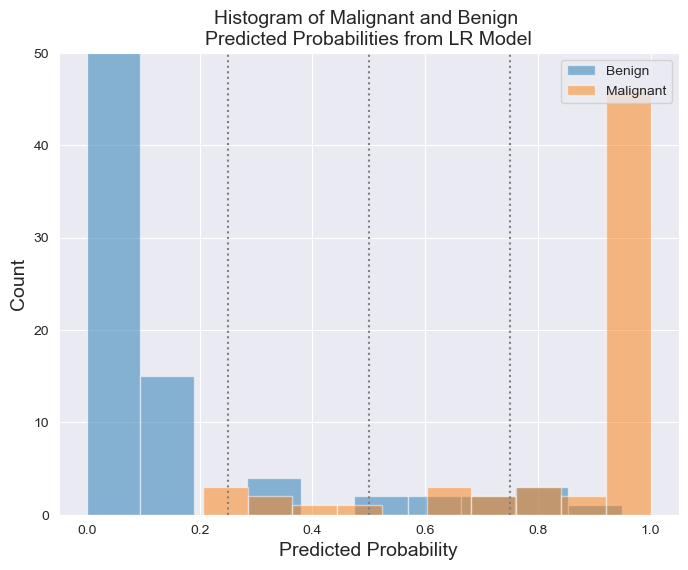

In [17]:
plt.figure(figsize=(8,6))
plt.hist(y_pred_prob[y_test==0,1], alpha=.5, label='Benign',)
plt.hist(y_pred_prob[y_test==1,1], alpha=.5 , label='Malignant')
plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.plot([.25, .25],[0,50],color='grey', linestyle=':')
plt.plot([.5, .5],[0,50],color='grey', linestyle=':')
plt.plot([.75, .75],[0,50],color='grey', linestyle=':')
plt.ylim([0,50])
plt.legend()
plt.title('Histogram of Malignant and Benign \nPredicted Probabilities from LR Model', fontsize=14)
plt.show()

1. The benign cases are heavily clustered around zero - Good, as they will be correctly classified as Benign

2. The Malignant cases are heavily clustered around one

The vertical lines depict hypothetical threshold values at 25%, 50%, and 75%.
For the highest threshold, almost all the samples above 75% belong to the malignant class
- there will be some benign cases that are misdiagnosed as malignant (false-positives).

In addition, there are a number of malignant cases that are missed (false-negatives).
If the lowest threshold value is used, almost all the malignant cases are identified, but there are more false-positives.

### The value of the threshold is a lever that can be used to tune a model's predicts
&nbsp;
- Higher values are associated with lower false-positives/higher false-negatives
- Lower values - false-negatives/higher false-positives.

In [18]:
## Using the predicted probabilities to get the predicted class
# 0.5 threshold
y_pred_class = (y_pred_prob[:,1]>0.5)*1.0

##1. Check if it's the same as the predicted class obtained using .predict()
print(abs(y_pred_class-y_pred).sum())

0.0


In [19]:
##2a.Changing the threshold now to be 0.25
print("Confusion Matrix: Threshold 0.25")
y_pred_class = (y_pred_prob[:,1]>0.25)*1.0
print(confusion_matrix( y_test, y_pred_class))

Confusion Matrix: Threshold 0.25
[[94 14]
 [ 2 61]]


In [20]:
print("Confusion Matrix: Threshold 0.5")
y_pred_class = (y_pred_prob[:,1]>0.5)*1.0
print(confusion_matrix( y_test, y_pred_class,))

Confusion Matrix: Threshold 0.5
[[98 10]
 [ 6 57]]


In [21]:
## 2b. Change the threshold to be 0.75 and compare it to the above
print("Confusion Matrix: Threshold 0.75")
y_pred_class = (y_pred_prob[:,1]>0.75)*1.0
print(confusion_matrix( y_test, y_pred_class))

Confusion Matrix: Threshold 0.75
[[104   4]
 [ 11  52]]


In [22]:
#create an array of threshold values between 0 and 1
thresh = np.linspace(0,1, 100)
#number of positive test cases
pos_cases = y_test.sum()

#### Choose an appropriate threshold so that no more than 2 in 100 malignancies are missed.

In [23]:
#3. Calculate the false negative rate for each threshold
fn_rate = [1 - sum(y_pred_prob[y_test==1][:,1]>t)/pos_cases for t in thresh]
#Find the first threshold value where the is greater than 2 per 100
max_thresh = thresh[np.argmax(np.array(fn_rate)>0.02)]
print(f'Max Threshold for less than 2 per 100 FNs:{max_thresh}')

Max Threshold for less than 2 per 100 FNs:0.22222222222222224


In [24]:
print("Confusion Matrix: Threshold 0.75")
y_pred_class = (y_pred_prob[:,1]>max_thresh)*1.0
print(confusion_matrix( y_test, y_pred_class))

Confusion Matrix: Threshold 0.75
[[94 14]
 [ 2 61]]


----

### Receiver Operating Characteristic (ROC) curve

True-positive rate vs false positive rate

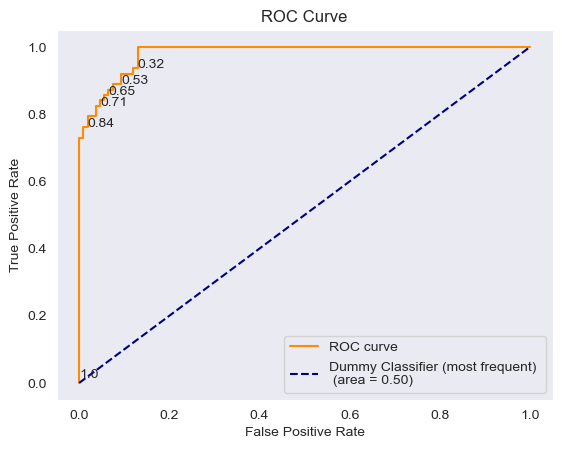

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

#### Area under the curve (AUC)

 using scikit-learn‘s `roc_auc_score` function.
 The input to this function has to contain the two arrays, y_true and y_score,
 where;
 - y_true is the true binary label
 - y_score is the predicted probability of the positive class.

In [26]:
##1. Find ROC_AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

ROC AUC score: 0.9810405643738976


----
&nbsp;
### Class Inbalance

In [27]:
predictor_var = ['radius_mean', 'texture_mean',
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'

x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=6, test_size=0.3)

In [28]:
print('Train positivity rate: ')
print(sum(y_train)/y_train.shape[0])
print('Test positivity rate: ')
print(sum(y_test)/y_test.shape[0])

Train positivity rate: 
0.34673366834170855
Test positivity rate: 
0.4327485380116959


#### 1. Stratified Sampling

In [29]:
## 1. Stratified Sampling
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var],
                                                    random_state=6, test_size=0.3, stratify=df[outcome_var])
print('Train positivity rate: ')
print(sum(y_train)/y_train.shape[0])
print('Test positivity rate: ')
print(sum(y_test)/y_test.shape[0])

Train positivity rate: 
0.37185929648241206
Test positivity rate: 
0.3742690058479532


#### 2. Model weighting

In [30]:
log_reg = LogisticRegression(penalty='none', max_iter=1000, fit_intercept=True, tol=0.000001)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print(f'Recall Score: {recall_score( y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score( y_test, y_pred)}')

Recall Score: 0.875
Accuracy Score: 0.9239766081871345


In [31]:
##2. Balanced Class weights
log_reg = LogisticRegression(penalty='none', max_iter=1000, fit_intercept=True, tol=0.000001, class_weight='balanced')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print(f'Recall Score: {recall_score( y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score( y_test, y_pred)}')

Recall Score: 0.90625
Accuracy Score: 0.9298245614035088


#### 3. Use over/under sampling

Use an oversampling technique on the minority class to balance the percentage of malignancy and benign. Verify the classes are balanced.

In [32]:
##3. Over/under-sampling
df_oversample = df[df[outcome_var]==1].sample(df[df[outcome_var]==0].shape[0], replace=True)
new_os_df = pd.concat([df[df[outcome_var]==0], df_oversample])
print('Oversampled class counts:')
print(new_os_df[outcome_var].value_counts())

Oversampled class counts:
0    357
1    357
Name: diagnosis, dtype: int64


----